In [1]:
from  function_set import *
import openpyxl

## 試題1
1.請利用python 把美股相關資料填入AU14:BC577<br>
2.把漲跌幅前10大個股的資料視覺化呈現<br>
3.加分題：把資料匯進Access資料庫<br>

In [2]:
# 讀取 ticker
symbols = pd.read_excel('試題.xlsx', sheet_name='試題一', usecols='AU:BC', skiprows=13, nrows=564)

In [3]:
data = pd.DataFrame()
for i in symbols['代碼.2']:
    temp = get_stock(str(i))
    data = pd.concat([data, temp])
    
result = symbols.merge(data, left_on= ['代碼.2'],right_on=['代碼'], how = 'left')
result = result[['代碼.2','收盤價','日漲跌幅(%)','日成交量','日最高價','日最低價']]
result.head(30)

代碼: No data found, symbol may be delisted
ABMD: No data found for this date range, symbol may be delisted
BF.B: No data found for this date range, symbol may be delisted
BRK.B: No data found, symbol may be delisted
CTXS: No data found, symbol may be delisted
DRE: No data found, symbol may be delisted
FBHS: No data found, symbol may be delisted
NLOK: No data found, symbol may be delisted
NLSN: No data found, symbol may be delisted
TWTR: No data found for this date range, symbol may be delisted
0: No data found, symbol may be delisted
0: No data found, symbol may be delisted
0: No data found, symbol may be delisted
0: No data found, symbol may be delisted
0: No data found, symbol may be delisted
0: No data found, symbol may be delisted
0: No data found, symbol may be delisted
0: No data found, symbol may be delisted
0: No data found, symbol may be delisted
0: No data found, symbol may be delisted
0: No data found, symbol may be delisted
0: No data found, symbol may be delisted
0: No data

,代碼.2,收盤價,日漲跌幅(%),日成交量,日最高價,日最低價
0,#DJI,32836.480469,-0.631287,1.167195e+08,33272.398438,32795.671875
1,#GSPC,3974.879883,-0.405161,9.607000e+08,4028.300049,3969.189941
2,#IXIC,11452.439453,-0.474759,2.072976e+09,11638.975586,11432.578125
3,#SOXX,2940.357666,1.658413,0.000000e+00,3002.970459,2931.249268
4,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN
8,代碼,NaN,NaN,NaN,NaN,NaN
9,A,141.639999,-0.309686,4.484010e+05,143.580002,141.309998


Text(0, 0.5, '報酬率')

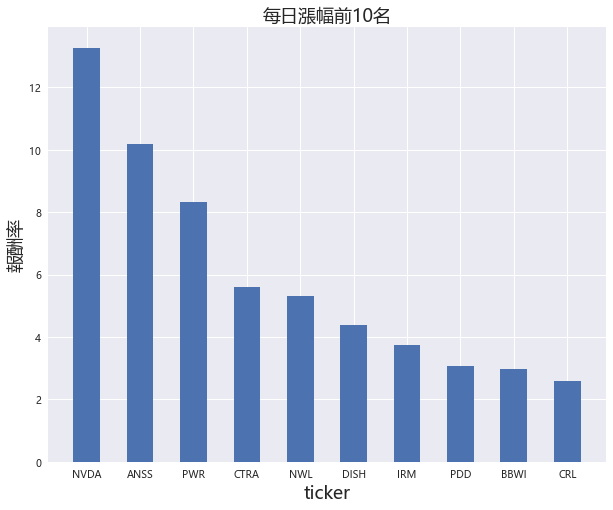

In [6]:
plt.style.use('seaborn')
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']
up_10 = data[data['日漲跌幅(%)']>0].sort_values('日漲跌幅(%)', ascending=False).head(10)
plt.figure(figsize=(10,8))
plt.bar(x = up_10['代碼'], height=up_10['日漲跌幅(%)'], label = '報酬率%', width=0.5)
plt.title('每日漲幅前10名', fontsize = 18)
plt.xlabel('ticker', fontsize = 18)
plt.ylabel('報酬率',fontsize = 18)

Text(0, 0.5, '報酬率')

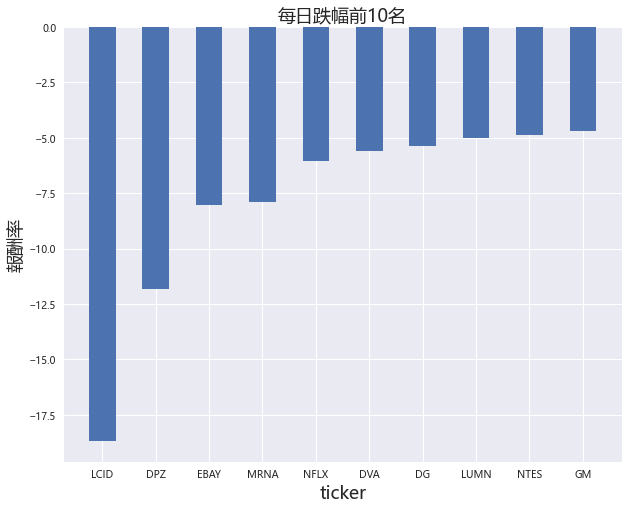

In [7]:
down_10 = data[data['日漲跌幅(%)']<0].sort_values('日漲跌幅(%)', ascending=True).head(10)
plt.figure(figsize=(10,8))
plt.bar(x = down_10['代碼'], height=down_10['日漲跌幅(%)'], label = '報酬率%', width=0.5)
plt.title('每日跌幅前10名', fontsize = 18)
plt.xlabel('ticker', fontsize = 18)
plt.ylabel('報酬率',fontsize = 18)

In [6]:
# 讀取 excel
workbook = openpyxl.load_workbook('試題.xlsx')
# 選取 試題一 的工作表
sheet = workbook.worksheets[0]
fill_columns = ['AW', 'AY','AZ','BA','BB']
for col in ['AW', 'AY','AZ','BA','BB']:
    for index in range(15, 15+len(result)):
        sheet[col+str(index)] = result.iloc[index-15, fill_columns.index(col)+1]

## 試題二
1.請用python爬蟲下載新聞，擷取A.標題、B連結(內文不用)，產出列於G13至G300(網站：鉅亨網、工商時報、經濟日報，三選二)<br>
選擇-> 鉅亨網, 工商時報<br>
2.加分題：給予每條新聞重要程度分數

In [7]:
anue_url = 'https://api.cnyes.com/media/api/v1/newslist/category/headline'
# eco_url = 'https://money.udn.com/rank/newest/1001/0/1?from=edn_navibar'
ctee_url = 'https://ctee.com.tw/livenews/aj'

In [8]:
tirgger = anue(anue_url, 1)
data_anue = tirgger.get_all_titles_urls()
data_anue

,news_urls,news_titles
0,https://news.cnyes.com/news/id/5095700,〈美股早盤〉科技股撐腰 主要指數開高 輝達漲逾12%
1,https://news.cnyes.com/news/id/5095969,建商富旺去年大虧9.78億元 每股虧6.35元 擬減資38%彌補虧損
2,https://news.cnyes.com/news/id/5095982,〈財報〉Nikola上季僅交車20輛電動卡車 營收遠低於預期
3,https://news.cnyes.com/news/id/5095701,美國上周初領失業金人數下滑 去年第四季GDP向下修正
4,https://news.cnyes.com/news/id/5095967,渣打：今年經濟成長預估值維持2.2%不變 央行3月利率按兵不動機率高
...,...,...
265,https://news.cnyes.com/news/id/5095730,富采去年稅後純益年減98% EPS 0.05元
266,https://news.cnyes.com/news/id/5095710,共享車個資也「共享」 和泰等3家公司遭證交所開罰
267,https://news.cnyes.com/news/id/5095728,元太去年每股賺8.69元寫新猷 擬配息4.5元
268,https://news.cnyes.com/news/id/5095704,美財長葉倫：美國將在「適當時間」恢復與中國經濟對話


In [9]:
trigger = ctee(ctee_url, 1)
data_ctee = trigger.get_all_titles_urls()
data_ctee

,news_urls,news_titles
0,https://ctee.com.tw/livenews/aj/ctee/A07601002...,Nvidia好嗨 外資讚台積目標價看690元 | 02/23 22:26
1,https://ctee.com.tw/livenews/aj/ctee/A82052002...,鈺齊去年下半年每股配息6元 | 02/23 22:20
2,https://ctee.com.tw/livenews/aj/ctee/A83205002...,數位資產深具潛力 新加坡強化監管建立信任 | 02/23 22:16
3,https://ctee.com.tw/livenews/aj/ctee/A07601002...,大摩重拳降評欣興 目標價砍到100元 | 02/23 22:08
4,https://ctee.com.tw/livenews/aj/ctee/A86127002...,台中五期完熟商圈 建商搶進卡位推案鎖定自住換屋族群 | 02/23 21:41
...,...,...
45,https://ctee.com.tw/livenews/aj/chinatimes/202...,《觀光股》柏文2022年轉盈 每股賺0.95元 | 02/22 07:59
46,https://ctee.com.tw/livenews/aj/chinatimes/202...,《其他電子》朋億*2022年營收、獲利雙創高 EPS11.74元 | 02/22 07:48
47,https://ctee.com.tw/livenews/aj/chinatimes/202...,《興櫃股》證交所董事會通過台灣虎航申請創新板 | 02/22 07:48
48,https://ctee.com.tw/livenews/aj/chinatimes/202...,《電子零件》欣興2022年大賺2股本 股利齊登峰、殖息率達5.82% | 02/22 07:38


In [10]:
data = pd.concat([data_anue, data_ctee]).reset_index(drop=True)
data

,news_urls,news_titles
0,https://news.cnyes.com/news/id/5095700,〈美股早盤〉科技股撐腰 主要指數開高 輝達漲逾12%
1,https://news.cnyes.com/news/id/5095969,建商富旺去年大虧9.78億元 每股虧6.35元 擬減資38%彌補虧損
2,https://news.cnyes.com/news/id/5095982,〈財報〉Nikola上季僅交車20輛電動卡車 營收遠低於預期
3,https://news.cnyes.com/news/id/5095701,美國上周初領失業金人數下滑 去年第四季GDP向下修正
4,https://news.cnyes.com/news/id/5095967,渣打：今年經濟成長預估值維持2.2%不變 央行3月利率按兵不動機率高
...,...,...
715,https://ctee.com.tw/livenews/aj/chinatimes/202...,《觀光股》柏文2022年轉盈 每股賺0.95元 | 02/22 07:59
716,https://ctee.com.tw/livenews/aj/chinatimes/202...,《其他電子》朋億*2022年營收、獲利雙創高 EPS11.74元 | 02/22 07:48
717,https://ctee.com.tw/livenews/aj/chinatimes/202...,《興櫃股》證交所董事會通過台灣虎航申請創新板 | 02/22 07:48
718,https://ctee.com.tw/livenews/aj/chinatimes/202...,《電子零件》欣興2022年大賺2股本 股利齊登峰、殖息率達5.82% | 02/22 07:38


In [11]:
# 讀取 excel
# workbook = openpyxl.load_workbook('試題.xlsx')
# 選取 試題一 的工作表
sheet = workbook.worksheets[1]
col = ['K']
for index in range(300-13):
    link = data.loc[index, 'news_urls']
    text = data.loc[index, 'news_titles']
    sheet.cell(row=index+13,column=7,value=text)
    sheet.cell(row=index+13,column=7).hyperlink=link

## 試題三

In [13]:
mops_url = 'https://mops.twse.com.tw/mops/web/ajax_t138sb02'

In [14]:
data = pd.DataFrame()
stks = ['2882','2330','1301']
for stk in stks:
    trigger = crawl_self_acc(mops_url, stk, '111')
    temp = trigger.get_self_acc_sales()
    data = pd.concat([data, temp])
data = data.reset_index(drop=True)
data

,代碼,股名,自結上一季獲利
0,2882,國泰金,-20543450
1,2330,台積電,334669874
2,1301,台塑,-7305379


In [15]:
# 讀取 excel
# workbook = openpyxl.load_workbook('試題.xlsx')
# 選取 試題一 的工作表
sheet = workbook.worksheets[2]
fill_columns = ['A', 'B','C']
for col in fill_columns:
    for index in range(len(data)):
        sheet[col+str(index+4)] = data.iloc[index, fill_columns.index(col)]

In [17]:
# 儲存檔案
workbook.save('answer.xlsx')